# Projekt 2 
### P. Fijałkowski, M. Krzyziński, T. Nocoń

## Inżynieria cech, wstępne modelowanie 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [2]:
online_shopping = pd.read_csv("online_shoppers_intention.csv")
data = online_shopping.copy() # robimy zmiany na tej ramce, a orginału nie ruszamy

In [3]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Tak jak ustaliliśmy przy poprzedniej części projektu, dla problemu klasteryzacji przed przejściem do jakichkolwiek czynności grupujących, należy znormalizować/przeskalować zmienne. Ponadto należy zająć się zmiennymymi typu kategorycznego (które w naszym przypadku są już w większości zakodowane w sposób liczbowy). Zastosujemy kilka podejść, by w dalszych etapach badać, które z nich będzie najlepsze.


### Zmiana wszystkich zmiennych na format liczbowy
Zanim przejdziemy do różnych skalowań, przeprowadźmy ogólny krok w preprocessingu: zamieńmy wszystkie dane w ramce na liczbowe - w tym celu konieczne jest zakodowanie nazw miesięcy (kolumn `Month`), typu odwiedzającego stronę (`VisitorType`) i informacji o tym, czy dana sesja odbyła się w weekend (`Weekend`) oraz czy przyniosła dochód (`Revenue`). 

#### Month

In [4]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
months_dict = {k: v+1 for v, k in enumerate(months)}
months_dict

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'June': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [5]:
old_months = data["Month"] # dla porównania
data["Month"] = data["Month"].map(months_dict)

In [6]:
pd.concat([data["Month"], old_months], axis=1).drop_duplicates() # jest ok

,Month,Month
0,2,Feb
184,3,Mar
2091,5,May
5455,10,Oct
5456,6,June
5460,7,Jul
5462,8,Aug
5463,11,Nov
5468,9,Sep
7982,12,Dec


#### VisitorType

In [7]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc_visitor_type = OrdinalEncoder()
data["VisitorType"] = ord_enc_visitor_type.fit_transform(data["VisitorType"].values.reshape(-1, 1))

In [8]:
ord_enc_visitor_type.categories_

[array(['New_Visitor', 'Other', 'Returning_Visitor'], dtype=object)]

#### Weekend,  Revenue

In [9]:
booleans = ['Weekend', 'Revenue']
for boolean in booleans:
    data[boolean] = data[boolean].transform(lambda val: 1 if val else 0)

#### Wynik

In [10]:
print(f"""Liczba kolumn numerycznych: {len(data.select_dtypes('number').columns)}
Liczba wszystkich kolumn: {len(data.columns)}""")

Liczba kolumn numerycznych: 18
Liczba wszystkich kolumn: 18


In [11]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2.0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2.0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2.0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2.0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,2.0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,2.0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,2.0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,2.0,0,0


Teraz możemy już przejść do różnych wariantów skalowania i kodowania zmiennych.

### Wariant 1 
Możemy uznać go za bazowy, wręcz prymitywny. W tym przypadku postąpimy bowiem bardzo prosto. Mając wszystkie zmienne w formie liczbowej, bez większego namysłu zastosujemy standardyzację. 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data_m1 = pd.DataFrame(scaled_data, columns = data.columns)

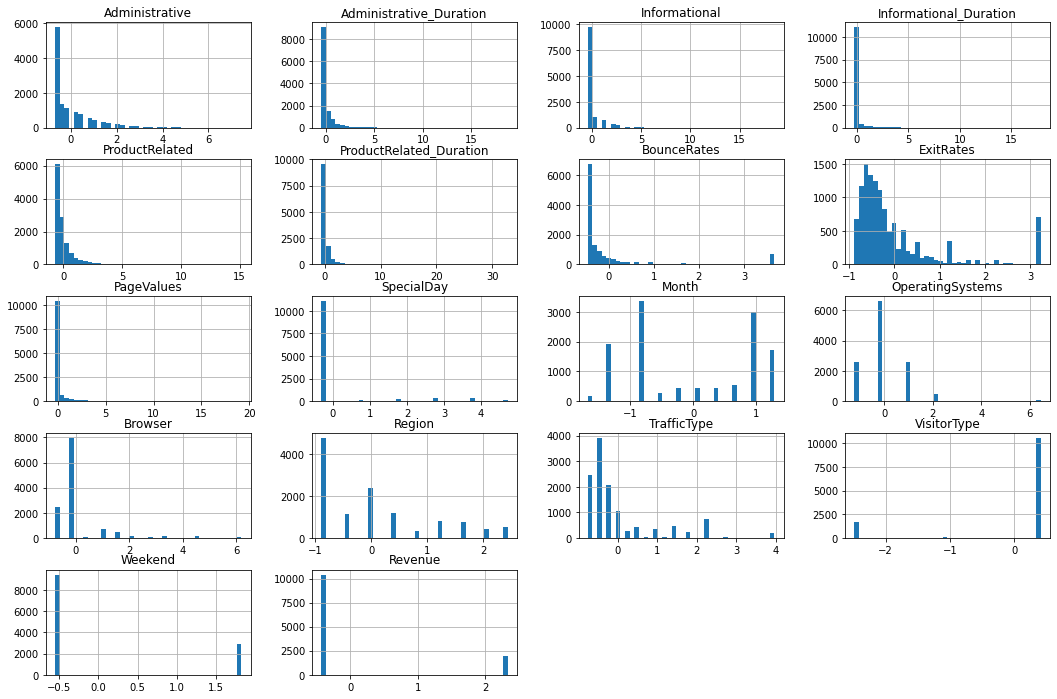

In [13]:
pd.DataFrame(data_m1).hist(bins = 40, figsize=(18, 12))
plt.show()

Jak widać zmienne zostały ustandaryzowane, ale zachowały kształty rozkładów, które widzieliśmy już w EDA. Widząc skośność niektórych zmiennych, można pomyśleć o transformacji logarytmicznej, by rozkłady były bardziej podobne do gaussowskich.

Aby zwizualizować wielowymiarowe dane po kolejnych przekształceniach wykorzystamy metodę redukcji wielowymiarowości `t-SNE`. 

In [14]:
from sklearn.manifold import TSNE
tSNE = TSNE(learning_rate = 400, random_state = 42, verbose = 1)

In [106]:
proj_tSNE_data1 = tSNE.fit_transform(data_m1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.001s...
[t-SNE] Computed neighbors for 12330 samples in 5.632s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

In [113]:
data_m1["tsne_1"] = proj_tSNE_data1[:, 0]
data_m1["tsne_2"] = proj_tSNE_data1[:, 1]

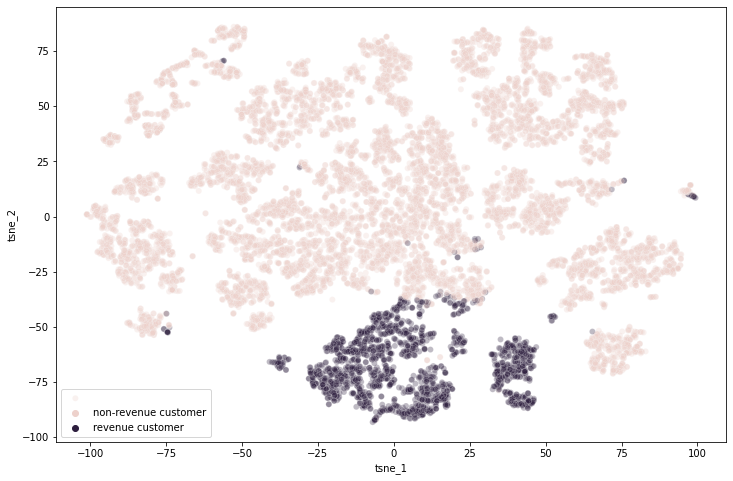

In [127]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "tsne_1",
                y = "tsne_2", 
                hue = "Revenue",
                alpha=0.3,
                data = data_m1)
plt.legend(labels=['', 'non-revenue customer', 'revenue customer'])
plt.show()

Widzimy, że taki zestaw danych zwizualizowany poprzez `tSNE` daje nam już całkiem ciekawy rezultat. Widzimy, że klienci ze względu na generowanie dochodu zostali odseparowani i w tych grupach również możemy wyróżnić kilka podgrup. Ale spróbjmy bardziej wyrafinowanych metod inżynierii danych. 

### Wariant 2 
Tym razem przed standardyzacją wykonamy transformację logarytmiczną zmiennych o skośnych rozkładach. 

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
log_features = ['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues']
transformer = ColumnTransformer(
    [ ('log', FunctionTransformer(np.log1p), log_features) ],
    remainder = 'passthrough'
)
transformed_data = transformer.fit_transform(data)
scaled_data = scaler.fit_transform(transformed_data)

data_m2 = pd.DataFrame(scaled_data, columns = data.columns)

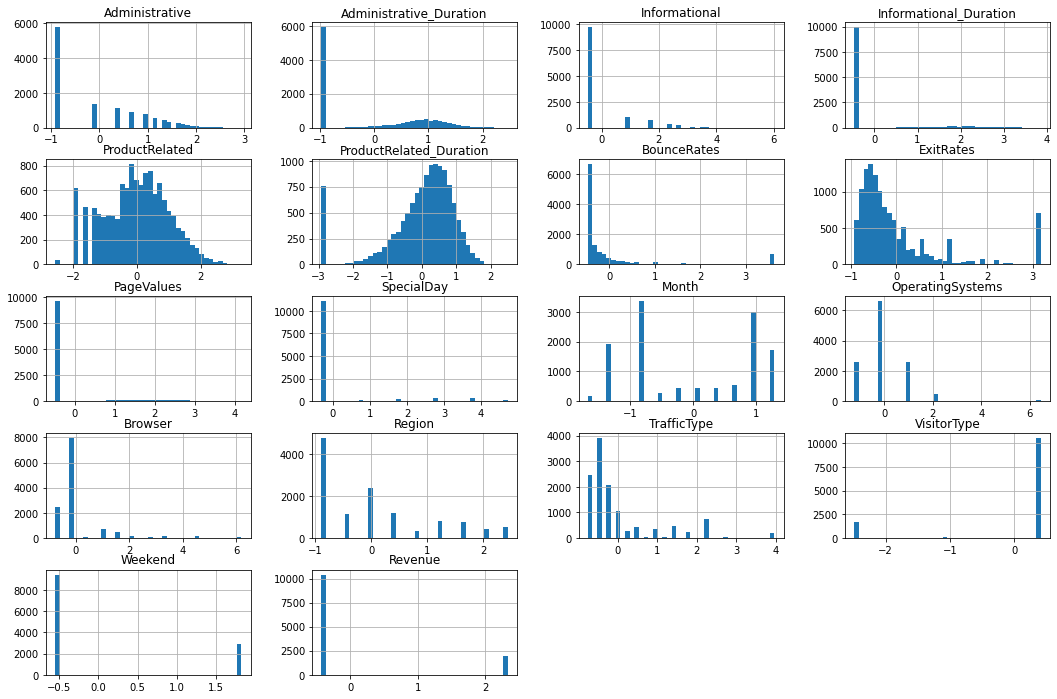

In [16]:
pd.DataFrame(data_m2).hist(bins = 40, figsize=(18, 12))
plt.show()

Zobaczmy, co teraz zwizualizuje nam tSNE. 

In [134]:
proj_tSNE_data2 = tSNE.fit_transform(data_m2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.001s...
[t-SNE] Computed neighbors for 12330 samples in 6.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

In [135]:
data_m2["tsne_1"] = proj_tSNE_data2[:, 0]
data_m2["tsne_2"] = proj_tSNE_data2[:, 1]

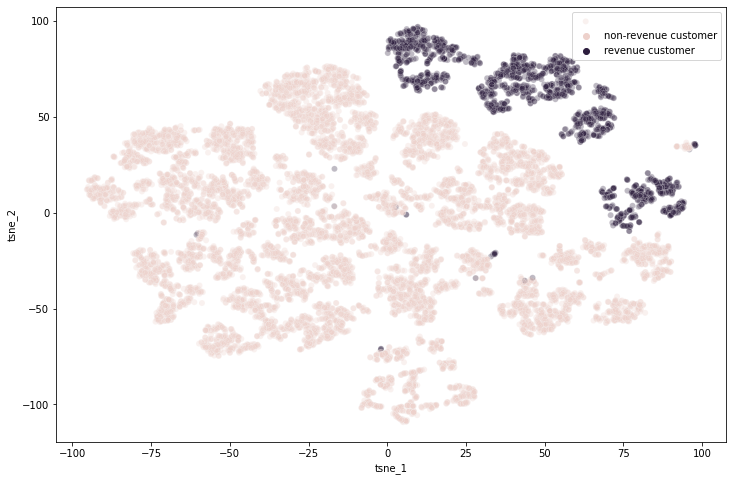

In [140]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "tsne_1",
                y = "tsne_2", 
                hue = "Revenue",
                alpha=0.3,
                data = data_m2)
plt.legend(labels=['', 'non-revenue customer', 'revenue customer'])
plt.show()

Przy takich samych parametrach algorytmu udało się osiągnąć lepsze (empirycznie) grupowanie. Ale nie poprzestawajmy na tym...

### Wariant 3
Do tej pory skalowaliśmy wszystkie zmienne. Te o naturze kategorycznej traktowaliśmy bowiem jak numeryczne, zakodowane przy pomocy label encodingu. Warto jednak zastanowić się nad zmianą sposobu kodowania i wykorzystać one hot encoding - stworzyć nowe kolumny indykatorowe. 

Jednak one hot encoding każdej unikalnej wartości dla tych zmiennych spowodowałby znaczny wzrost wymiarowości danych. Żeby to zrobić lepiej, zobaczymy najpierw jaki rozkład mają te zmienne.

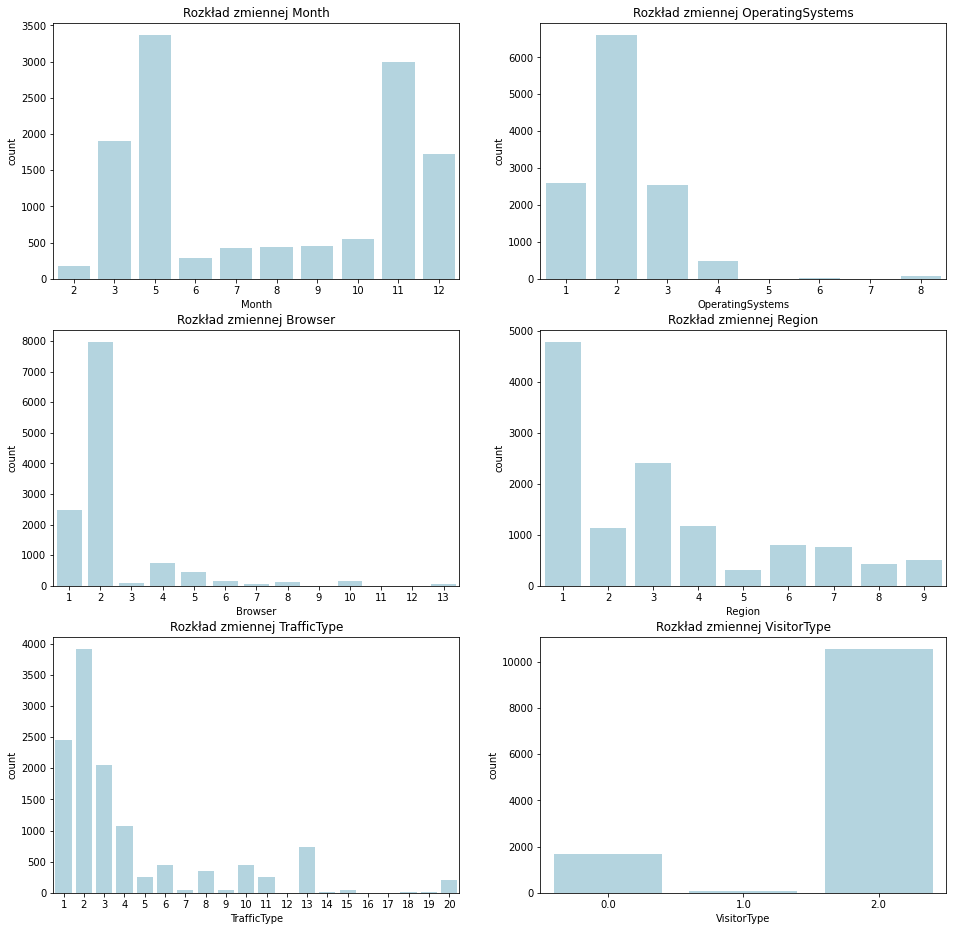

In [312]:
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
for i in range(0, len(categorical)):
    sns.countplot(data=data, x=categorical[i], 
                  ax=axes[i//2, i%2], color = "lightblue").set_title(f"Rozkład zmiennej {categorical[i]}")

W przypadku niektórych zmiennych, niewielka liczba kategorii odpowiada za większość wyników. Stąd pomysł, by dla każdej kolumny wziąć pierwsze najbardziej znaczące kategorie, pozostałe natomiast złączyć w jedną. Ponadto miesiące połączymy w kwartały, a zmienną `VisitorType` zakodujemy wprost. 

In [313]:
data_m3 = pd.DataFrame(transformed_data, columns = data.columns)
data_m3.loc[data["Month"].isin([1, 2, 3]), "Quarter"] = 1
data_m3.loc[data["Month"].isin([4, 5, 6]), "Quarter"] = 2
data_m3.loc[data["Month"].isin([7, 8, 9]), "Quarter"] = 3
data_m3.loc[data["Month"].isin([10, 11, 12]), "Quarter"] = 4
data_m3 = data_m3.drop("Month", axis=1)

In [314]:
data_m3 = pd.get_dummies(data_m3, prefix=['Quarter', 'VisitorType'], columns=['Quarter', 'VisitorType'])

In [315]:
def one_hot_encoder(dic, df):
    df_copy = df.copy()
    for m_r in dic.keys():
        most_import = df_copy[m_r].value_counts()[:dic[m_r]].index.tolist()
        df_copy[m_r] = df_copy[m_r].transform(lambda x: x if (x in most_import) else 'others').astype(str)
        encoder = OneHotEncoder(sparse=False, drop=["others"])
        one_hot = pd.DataFrame(encoder.fit_transform(df_copy[[m_r]]))
        one_hot.columns = encoder.get_feature_names([m_r])
        df_copy = pd.concat([df_copy, one_hot], axis=1)
        df_copy = df_copy.drop(m_r, axis=1)
    return df_copy

In [316]:
most_relevant = {"TrafficType" : 5,
                 "Browser" : 2,
                 "OperatingSystems" : 4,
                 "Region" : 4}

data_m3 = one_hot_encoder(most_relevant, data_m3)

Takie zmienne też oczywiście ustandaryzujemy, początkowo wszystkie - łącznie z tymi przed chwilą zakodowanymi. 

In [317]:
scaled_data = scaler.fit_transform(data_m3)
data_m3a = pd.DataFrame(scaled_data, columns = data_m3.columns)

In [318]:
proj_tSNE_data3a = tSNE.fit_transform(data_m3a)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.001s...
[t-SNE] Computed neighbors for 12330 samples in 6.837s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

In [319]:
data_m3a["tsne_1"] = proj_tSNE_data3a[:, 0]
data_m3a["tsne_2"] = proj_tSNE_data3a[:, 1]

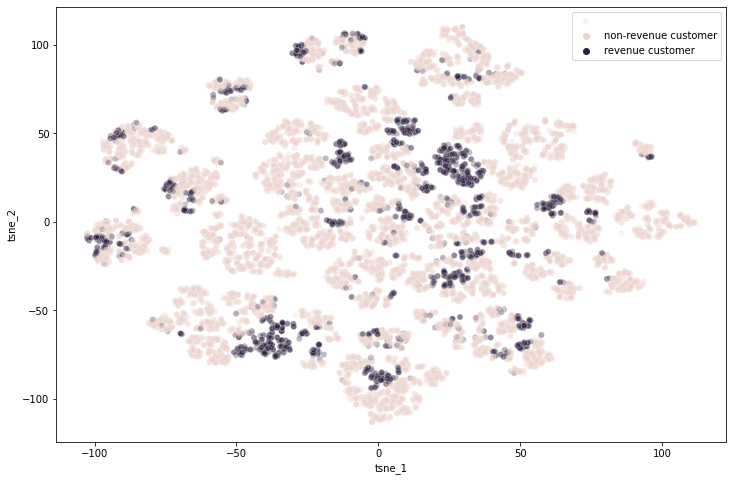

In [320]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "tsne_1",
                y = "tsne_2", 
                hue = "Revenue",
                alpha=0.3,
                data = data_m3a)
plt.legend(labels=['', 'non-revenue customer', 'revenue customer'])
plt.show()

Niestety w tym przypadku tSNE nie zwizualizował podziału zgodnie z naszymi oczekiwaniami. :(

Spróbujemy jeszcze nie standardyzować zmiennych po one hot encodingu, a tylko wszystkie pozostałe - liczbowe.

In [321]:
num_features = ['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues', "SpecialDay"]
scaler = ColumnTransformer(
    [ ('log', StandardScaler(), num_features)],
    remainder = 'passthrough'
)
scaled_data = scaler.fit_transform(data_m3)
data_m3b = pd.DataFrame(scaled_data, columns = data_m3.columns)

In [324]:
proj_tSNE_data3b = tSNE.fit_transform(data_m3b)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.001s...
[t-SNE] Computed neighbors for 12330 samples in 5.316s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

In [325]:
data_m3b["tsne_1"] = proj_tSNE_data3b[:, 0]
data_m3b["tsne_2"] = proj_tSNE_data3b[:, 1]

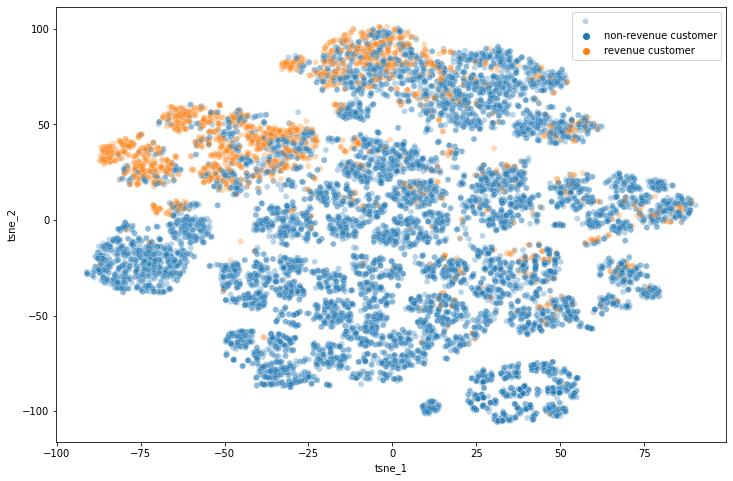

In [326]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "tsne_1",
                y = "tsne_2", 
                hue = "Revenue",
                alpha=0.3,
                data = data_m3b)
plt.legend(labels=['', 'non-revenue customer', 'revenue customer'])
plt.show()

Teraz wygląda to lepiej, ale wciąż nie jest to oczekiwany rezultat. 

## Wstępne modelowanie

W tej sekcji przedstawimy najprostszy model algorytmu clusteringu - `KMeans`. Będzie on stanowił punkt wyjścia dla rozważań w dalszych pracach, jako osiągnięty niskim kosztem efekt.

Z racji wielowymiarowości naszych danych (18 kolumn) występuje spora trudność w pierwszym kroku - zakreśleniu obszaru poszukiwań optymalnej ilości klastrów do algorytmu. Przeszukamy więc relatywnie zakres od 4 do 14 klastrów.


### - dla danych bez transformacji - baseline

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score

<AxesSubplot:xlabel='cluster_amount'>

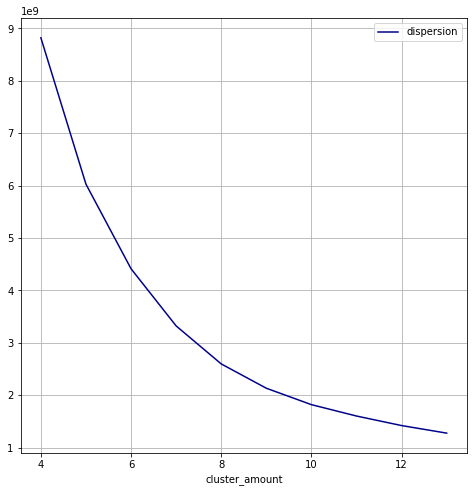

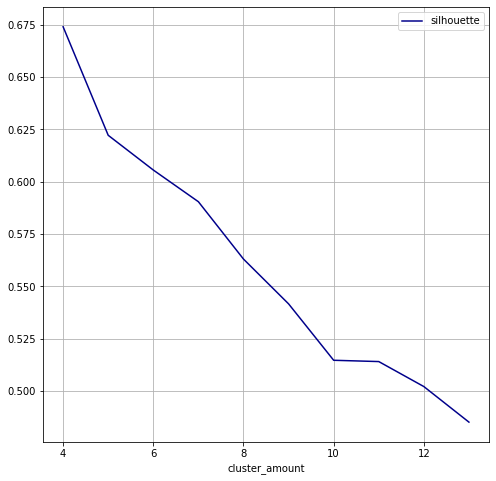

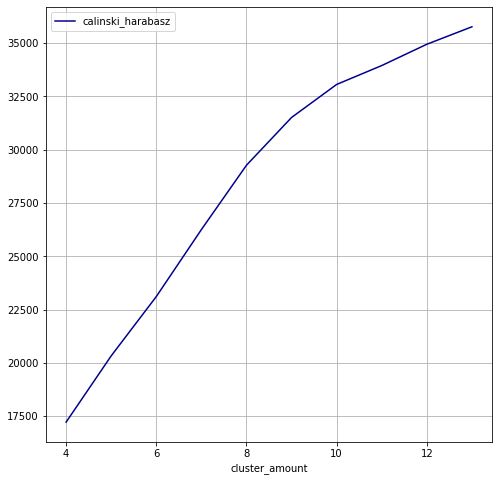

In [25]:
result_dispersion = list()
result_silhouette = list()
result_ch = list()
for cluster_amount in range(4,14):
    my_kmean = KMeans(n_clusters=cluster_amount)
    labels = my_kmean.fit_predict(data)
    result_dispersion.append({"cluster_amount": cluster_amount, "dispersion": my_kmean.inertia_})
    result_silhouette.append({"cluster_amount": cluster_amount, "silhouette": silhouette_score(data,labels)})
    result_ch.append({"cluster_amount": cluster_amount, "calinski_harabasz": calinski_harabasz_score(data, labels)})
pd.DataFrame(result_dispersion, columns=["cluster_amount","dispersion"]).plot.line("cluster_amount", "dispersion", c='DarkBlue', figsize=(8,8), grid=True)
pd.DataFrame(result_silhouette, columns=["cluster_amount","silhouette"]).plot.line("cluster_amount", "silhouette", c='DarkBlue', figsize=(8,8), grid=True)
pd.DataFrame(result_ch, columns=["cluster_amount","calinski_harabasz"]).plot.line("cluster_amount", "calinski_harabasz", c='DarkBlue', figsize=(8,8), grid=True)

Analizując powyższe wykresy możemy stwierdzić, że w naszym przypadku, problem doboru optymalnej ilości klastrów jest bardzo nietrywialny. Z jednej strony "łokieć" wskazujemy w sytuacji 8 klastrów, a z drugiej rosnąca ilość klastrów, pociąga za sobą malejącą wartość metryki `silhouette` (a więc mniejszą poprawność "przydziału" czy spójność wewnątrz klastrową).

Indeks Calińskiego-Harabasza (wykres 3) sugeruje natomiast docelowy wybór 9 klastrów

In [64]:
optimized_kmean = KMeans(n_clusters=9)
labels = optimized_kmean.fit_predict(data)
data['label'] = labels
cluster_sizes = data.groupby('label').size()
revenue_amount = data[['Revenue', 'label']].groupby('label').sum('Revenue')['Revenue']

In [105]:
ratios = [revenue_amount[i]/cluster_sizes[i] for i in range(9)]
combined = zip(range(9), list(cluster_sizes), ratios)
combined = sorted(combined,key=lambda x: x[2],reverse=True)
for i in range(9):
    print(f"CLUSTER {combined[i][0]}: size={combined[i][1]} revenue_ratio={combined[i][2]}")

CLUSTER 6: size=56 revenue_ratio=0.4107142857142857
CLUSTER 1: size=358 revenue_ratio=0.3463687150837989
CLUSTER 8: size=149 revenue_ratio=0.3221476510067114
CLUSTER 3: size=10 revenue_ratio=0.3
CLUSTER 2: size=813 revenue_ratio=0.23124231242312424
CLUSTER 7: size=3196 revenue_ratio=0.20619524405506884
CLUSTER 4: size=1715 revenue_ratio=0.20524781341107873
CLUSTER 0: size=6031 revenue_ratio=0.08472890067982093
CLUSTER 5: size=2 revenue_ratio=0.0


Widzimy więc, że istnieją klastry w których znaczący procent stanowią klienci generujący dochód dla sklepu (przede wszystkim 6, 1, 8, 3). Na dalszym etapie modelowania będziemy starać się wyjaśniać czym charakteryzują się owe klastry i przede wszystkim czym różnią się od obserwacji znajdujących się np. w klastrze 5).

Miejmy również na uwadze rozmiary klastrów (w szczególności przeważający rozmiarem klaster 0).

### - dla danych po transformacji
Sprawdzimy jak przeprowadzone wyżej transformacje wpłyną na wynik clusteringu metodą KMeans. W tym celu przeprowadzimy klasteryzację na ramce danych uzyskanej w wariancie 2 przekształceń, tj. z transformacją logarytmiczną zmiennych o skośnych rozkładach. 

<AxesSubplot:xlabel='cluster_amount'>

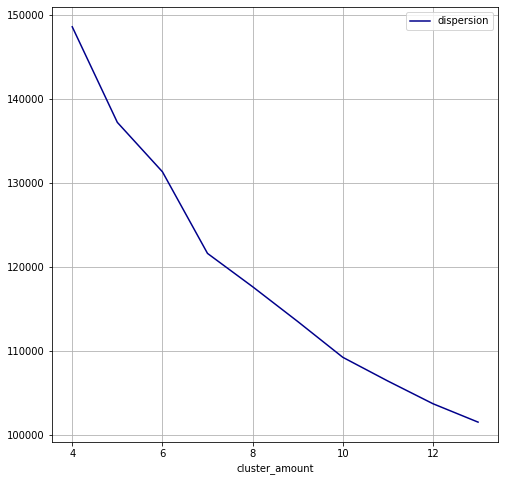

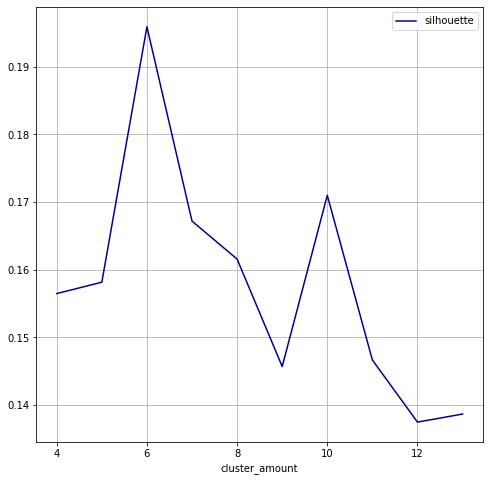

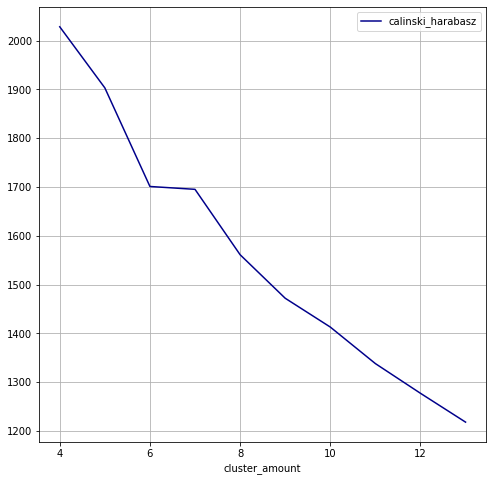

In [56]:
result_dispersion = list()
result_silhouette = list()
result_ch = list()
for cluster_amount in range(4,14):
    my_kmean = KMeans(n_clusters=cluster_amount, random_state=42)
    labels = my_kmean.fit_predict(data_m2)
    result_dispersion.append({"cluster_amount": cluster_amount, "dispersion": my_kmean.inertia_})
    result_silhouette.append({"cluster_amount": cluster_amount, "silhouette": silhouette_score(data_m2,labels)})
    result_ch.append({"cluster_amount": cluster_amount, "calinski_harabasz": calinski_harabasz_score(data_m2, labels)})
pd.DataFrame(result_dispersion, columns=["cluster_amount","dispersion"]).plot.line("cluster_amount", "dispersion", c='DarkBlue', figsize=(8,8), grid=True)
pd.DataFrame(result_silhouette, columns=["cluster_amount","silhouette"]).plot.line("cluster_amount", "silhouette", c='DarkBlue', figsize=(8,8), grid=True)
pd.DataFrame(result_ch, columns=["cluster_amount","calinski_harabasz"]).plot.line("cluster_amount", "calinski_harabasz", c='DarkBlue', figsize=(8,8), grid=True)

W tym przypadku  problem doboru optymalnej ilości klastrów na podstawie wybranych metryk i wygenerowanych wykresów również jest trudnym zadaniem. Ciężko wskazać jedną wartość, dla której każda z metryk dawałaby zadowalający rezultat, w sensie widocznego odcięcia czy lokalnego maksimum. 

Zależy nam jednak na wyodrębnieniu większej ilości grup klientów, więc wybierzemy ilość 10 klastrów, która odpowiada lokalnemu i widać lekkie przegięcie na wykresach w dwóch pozostałych metrykach.

In [65]:
optimized_kmean = KMeans(n_clusters=10, random_state=42)
labels = optimized_kmean.fit_predict(data_m2)
data['label'] = labels
cluster_sizes = data.groupby('label').size()
revenue_amount = data[['Revenue', 'label']].groupby('label').sum('Revenue')['Revenue']
ratios = [revenue_amount[i]/cluster_sizes[i] for i in range(10)]
combined = zip(range(10), list(cluster_sizes), ratios)
combined = sorted(combined,key=lambda x: x[2],reverse=True)
for i in range(10):
    print(f"CLUSTER {combined[i][0]}: size={combined[i][1]} revenue_ratio={combined[i][2]}")

CLUSTER 6: size=527 revenue_ratio=0.9962049335863378
CLUSTER 5: size=1192 revenue_ratio=0.9865771812080537
CLUSTER 0: size=1209 revenue_ratio=0.06947890818858561
CLUSTER 2: size=968 revenue_ratio=0.042355371900826444
CLUSTER 9: size=1304 revenue_ratio=0.027607361963190184
CLUSTER 8: size=814 revenue_ratio=0.02702702702702703
CLUSTER 7: size=2237 revenue_ratio=0.008046490835940992
CLUSTER 4: size=835 revenue_ratio=0.004790419161676647
CLUSTER 1: size=1730 revenue_ratio=0.0011560693641618498
CLUSTER 3: size=1514 revenue_ratio=0.0


Udało nam się wydzielić dwa klastry (6 i 5) zawierające niemalże tylko klientów przynoszących dochód i aż 8 klastrów z klientów, których sesje nie przyniosły dochodu. Przy czym należy zauważyć, że każda z klas jest dość liczna. To zadowalający wynik. Umożliwia to dalszą identyfikację klastrów, znalezienie powiązań i zależności wewnątrz nich i pomiędzy nimi, tak by zprofilować poszczególne grupy użytkowników. 

### Próba ograniczenia liczby zmiennych 
Ramka danych, na której działamy ma 18 kolumn, nie jest to bardzo dużo, jednak należy sprawdzić, czy można ograniczyć liczbę zmiennych bez utraty cennych informacji. W tym celu wykorzystamy PCA.

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_m2)

PCA()

In [34]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.25229118 0.34959173 0.43409138 0.51068939 0.58153305 0.64385974
 0.70053353 0.75474412 0.80638892 0.85516214 0.8969228  0.93786715
 0.96268478 0.98215577 0.98794181 0.99258067 0.99674238 1.        ]


Okazuje się, że wybierając 2/3 kolumn jesteśmy w stanie wyjaśnić ok. 94% wariancji w danych, a ostatnie 4 komponenty wnoszą nam łącznie mniej niż 2% wariancji. 
Sprawdzimy, jak na danych przekształconych przez PCA poradzi sobie algorytm KMeans. 

In [35]:
data_pca = PCA(n_components=12).fit_transform(data_m2)

<AxesSubplot:xlabel='cluster_amount'>

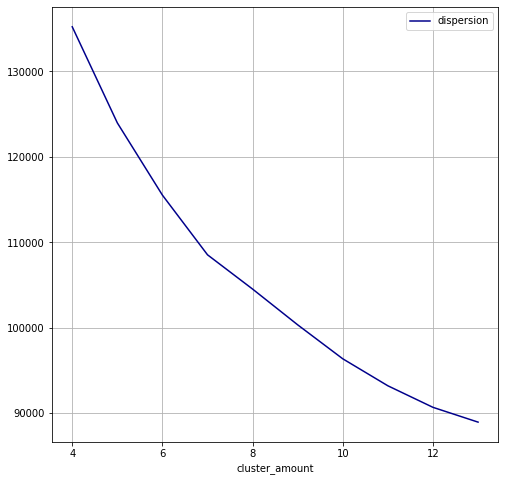

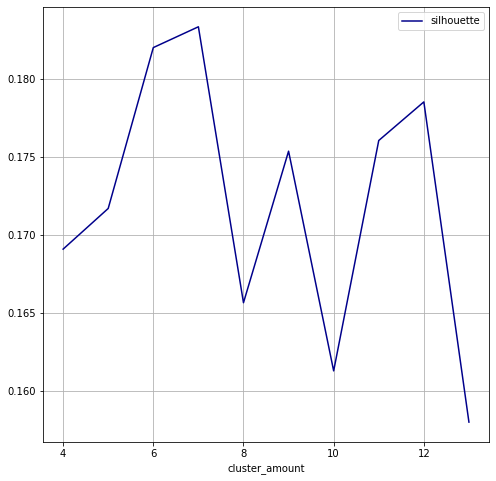

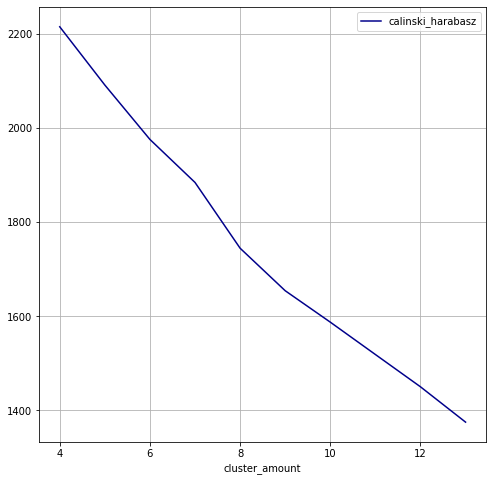

In [59]:
result_dispersion = list()
result_silhouette = list()
result_ch = list()
for cluster_amount in range(4,14):
    my_kmean = KMeans(n_clusters=cluster_amount)
    labels = my_kmean.fit_predict(data_pca)
    result_dispersion.append({"cluster_amount": cluster_amount, "dispersion": my_kmean.inertia_})
    result_silhouette.append({"cluster_amount": cluster_amount, "silhouette": silhouette_score(data_pca,labels)})
    result_ch.append({"cluster_amount": cluster_amount, "calinski_harabasz": calinski_harabasz_score(data_pca, labels)})
pd.DataFrame(result_dispersion, columns=["cluster_amount","dispersion"]).plot.line("cluster_amount", "dispersion", c='DarkBlue', figsize=(8,8), grid=True)
pd.DataFrame(result_silhouette, columns=["cluster_amount","silhouette"]).plot.line("cluster_amount", "silhouette", c='DarkBlue', figsize=(8,8), grid=True)
pd.DataFrame(result_ch, columns=["cluster_amount","calinski_harabasz"]).plot.line("cluster_amount", "calinski_harabasz", c='DarkBlue', figsize=(8,8), grid=True)

Na danych przekształconych przez PCA najlepszym wyborem na liczbę klastrów na podstawie powyższych metryk wydaje się 7. To wartość, dla której maksymalizowany jest silhouette score i widać łokieć na elbow plocie. 

In [74]:
optimized_kmean = KMeans(n_clusters=7, random_state=42)
labels = optimized_kmean.fit_predict(data_pca)
data['label'] = labels
cluster_sizes = data.groupby('label').size()
revenue_amount = data[['Revenue', 'label']].groupby('label').sum('Revenue')['Revenue']
ratios = [revenue_amount[i]/cluster_sizes[i] for i in range(7)]
combined = zip(range(7), list(cluster_sizes), ratios)
combined = sorted(combined,key=lambda x: x[2],reverse=True)
for i in range(7):
    print(f"CLUSTER {combined[i][0]}: size={combined[i][1]} revenue_ratio={combined[i][2]}")

CLUSTER 0: size=1284 revenue_ratio=0.9750778816199377
CLUSTER 5: size=1874 revenue_ratio=0.21451440768409819
CLUSTER 4: size=1249 revenue_ratio=0.07045636509207366
CLUSTER 6: size=2540 revenue_ratio=0.029921259842519685
CLUSTER 3: size=859 revenue_ratio=0.025611175785797437
CLUSTER 2: size=3670 revenue_ratio=0.017438692098092644
CLUSTER 1: size=854 revenue_ratio=0.00468384074941452


Otrzymaliśmy w ten sposób jeden klaster z klientami przynoszącymi dochód, jeden mieszany i 5 klastrów z klientami, którzy nie przynieśli dochodów. Mieszany klaster nie byłby jednak dla nas korzystnym zgrupowaniem. 

## Wnioski

Przeprowadzając inżynierię cech, wnioskujemy o nietrywialności rozważanego zagadnienia. Z uwagi na wielowymiarowość problemu (w sensie matematycznym i ludzkim), nie jest łatwym zadaniem jednoznacznie wybrać zestaw przekształceń zmiennych i dobrać rozmiary problemu celem osiągnięcia pożądanego efektu.

Idąc dalej, można podejrzewać, że problem nie ma jednoznacznego "rozwiązania", wiemy przecież jak złożona jest natura ludzka, jak wiele składników może na nią wpływać. W takiej sytuacji jednoznaczna kategoryzacja osób przestaje być możliwa.

W dalszych pracach planujemy testować inne ograniczenia na ilość zmiennych i zamodelować odpowiadający naszemu problemowi algorytm klasteryzacji, wyjaśniając różnicę pomiędzy charakterystykami obserwacji należących do danego klastra.

Warte sprawdzenia przy końcowym modelowaniu są także inne algorytmy klasteryzacji, przede wszystkim aglomeracyjny. 